## Sin cluster

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
pd.options.display.float_format = "{:,.2f}".format
import sys
sys.path.append("../")
from src import soporte_ajuste as sa

In [2]:
df = pd.read_csv('../data/Global_Superstore_clustering.csv', encoding='ISO-8859-1', index_col=0)
df = df.drop(columns=["clusters_kmeans","clusters_agglomerative"])
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'Sales_respuesta'],
      dtype='object')

In [3]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Sales_respuesta')

params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='tree', param_grid=params_arbol, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.sample(3)

d:\develop\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,Real,Predicho,Conjunto,Modelo,Residuos
18082,125.64,159.26,Train,tree,-33.62
2017,560.97,"1,109.42",Train,tree,-548.45
23788,189.60,44.47,Train,tree,145.13


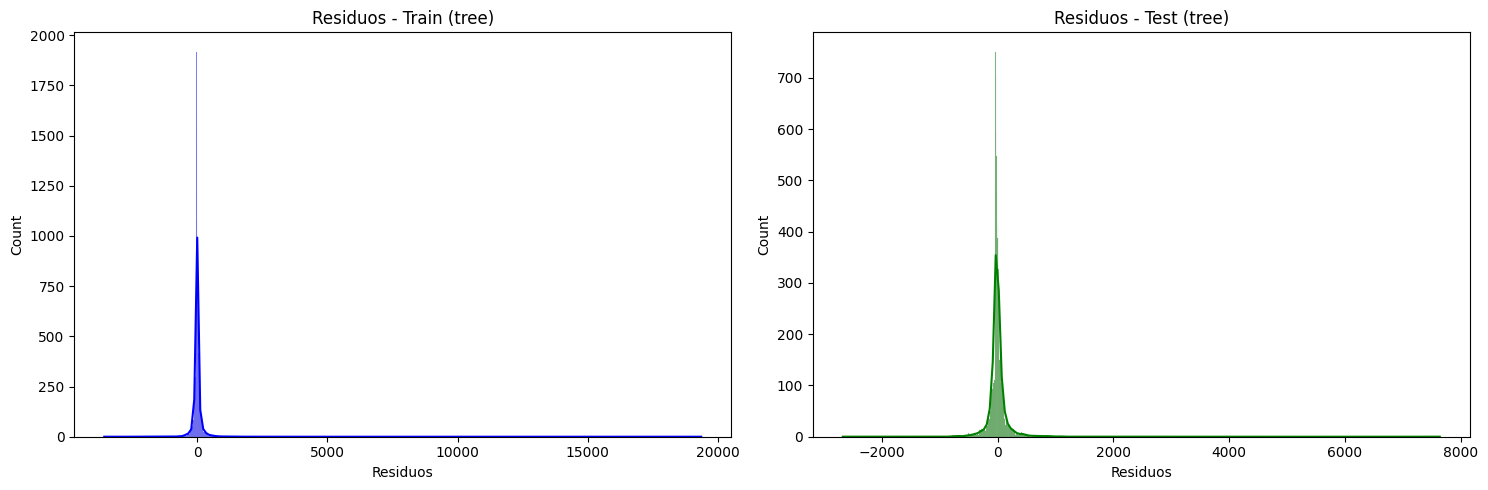

In [4]:
analisis.plot_residuos("tree")

In [5]:
analisis.calcular_metricas("tree")

,train,test
R2,0.79,0.80
MAE,86.46,89.43
MSE,"50,754.53","45,106.84"
RMSE,225.29,212.38


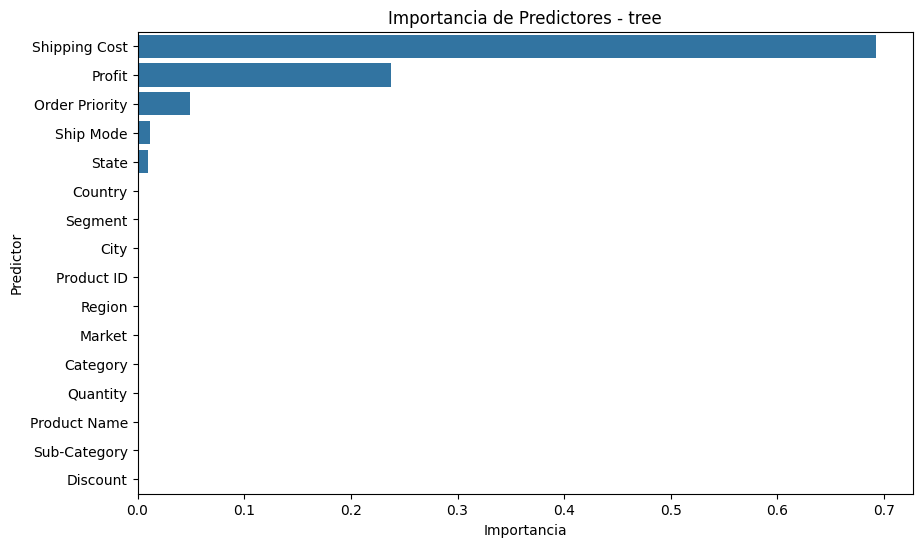

,Predictor,Importancia
14,Shipping Cost,0.69
13,Profit,0.24
15,Order Priority,0.05
0,Ship Mode,0.01
3,State,0.01
4,Country,0.00
1,Segment,0.00
2,City,0.00
7,Product ID,0.00
6,Region,0.00


In [6]:
analisis.importancia_predictores("tree")

In [7]:
# instanciamos la clase de regresión lineal
analisis_random_forest = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Sales_respuesta')

params_rf = {
    'n_estimators': [150],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [1], 
    'max_leaf_nodes': [30]
}

# llamamos a la función para ajustar el modelo
analisis_random_forest.ajustar_modelo(modelo='random_forest', scoring="neg_mean_squared_error", param_grid=params_rf)

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_analisis_random_forest = analisis_random_forest.obtener_resultados()
df_resultados_analisis_random_forest.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
2558,"2,276.48",765.83,Train,random_forest,"1,510.66"
15041,289.71,278.31,Train,random_forest,11.40
38072,17.40,42.42,Train,random_forest,-25.02


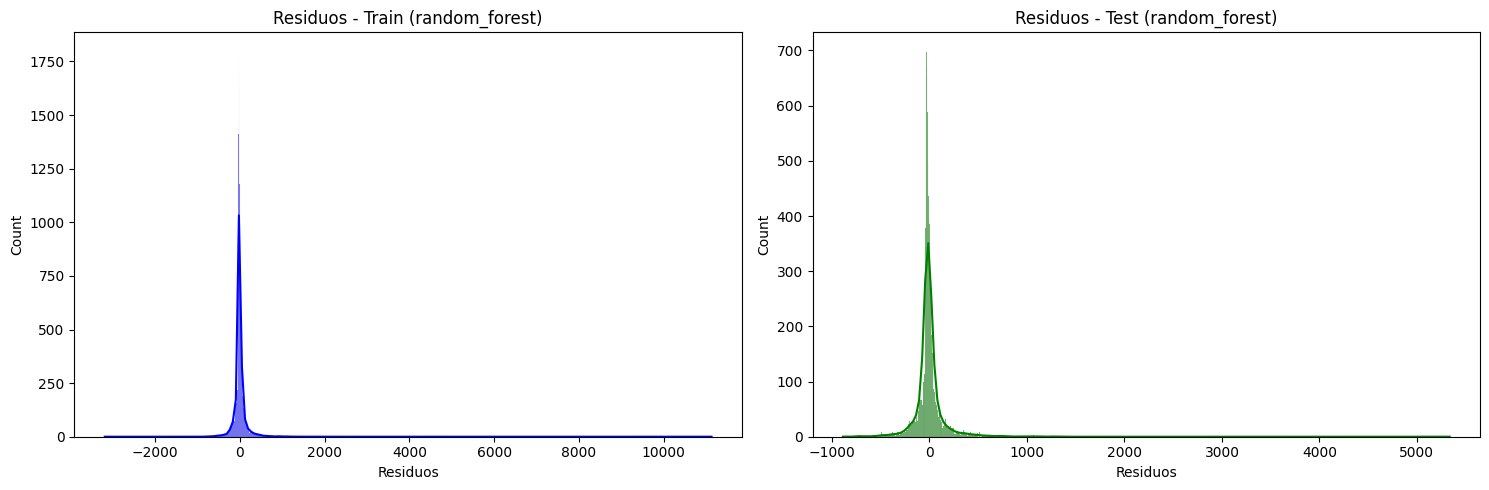

In [8]:
analisis_random_forest.plot_residuos("random_forest")

In [9]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.85,0.82
MAE,81.13,84.20
MSE,"35,018.02","39,404.05"
RMSE,187.13,198.50


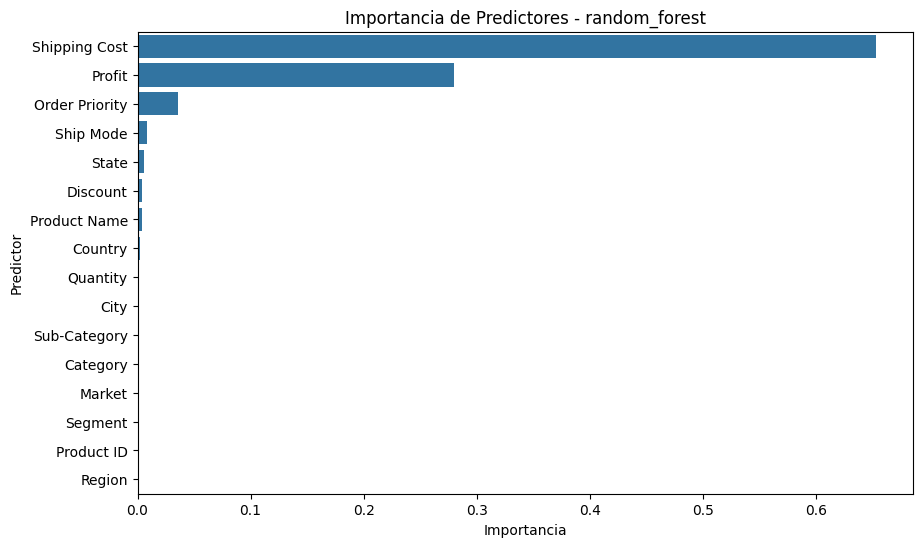

,Predictor,Importancia
14,Shipping Cost,0.65
13,Profit,0.28
15,Order Priority,0.04
0,Ship Mode,0.01
3,State,0.01
12,Discount,0.00
10,Product Name,0.00
4,Country,0.00
11,Quantity,0.00
2,City,0.00


In [10]:
analisis_random_forest.importancia_predictores("random_forest")

In [11]:
# instanciamos la clase de regresión lineal
analisis_gradient_boosting = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Sales_respuesta')

params_gb = {
    'n_estimators': [100],
    'learning_rate': [0.01],
    'max_depth': [5],
    'min_samples_split': [5],
    'min_samples_leaf': [5]
}

# llamamos a la función para ajustar el modelo
analisis_gradient_boosting.ajustar_modelo(modelo='gradient_boosting',param_grid = params_gb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient_boosting = analisis_gradient_boosting.obtener_resultados()
df_resultados_gradient_boosting.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
2558,"2,276.48",674.77,Train,gradient_boosting,"1,601.71"
15041,289.71,295.87,Train,gradient_boosting,-6.16
38072,17.40,114.55,Train,gradient_boosting,-97.15


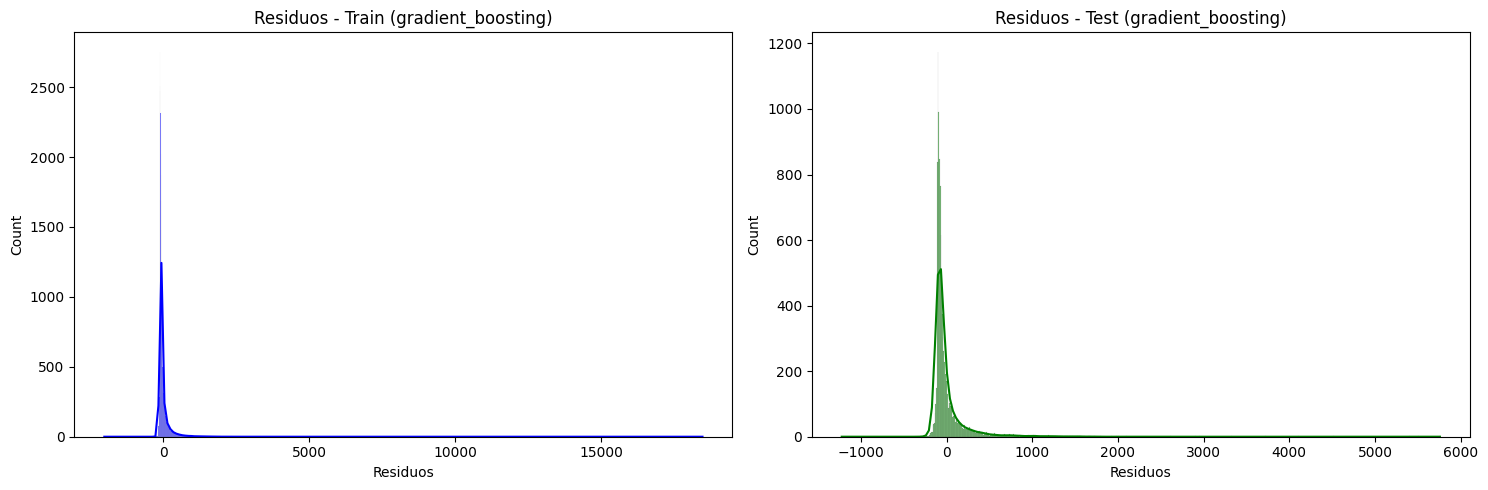

In [12]:
analisis_gradient_boosting.plot_residuos("gradient_boosting")

In [13]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")

,train,test
R2,0.72,0.72
MAE,119.65,121.87
MSE,"67,984.41","61,626.82"
RMSE,260.74,248.25


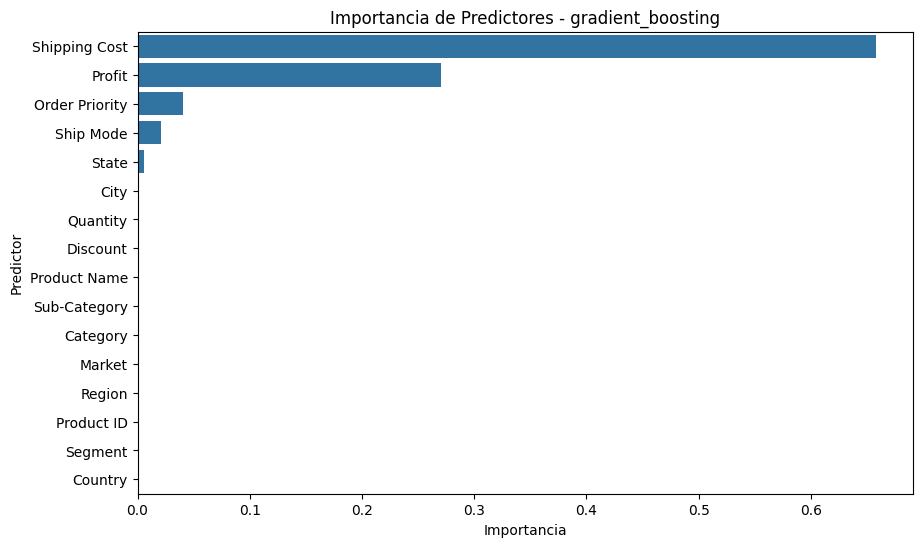

,Predictor,Importancia
14,Shipping Cost,0.66
13,Profit,0.27
15,Order Priority,0.04
0,Ship Mode,0.02
3,State,0.01
2,City,0.00
11,Quantity,0.00
12,Discount,0.00
10,Product Name,0.00
9,Sub-Category,0.00


In [14]:
analisis_gradient_boosting.importancia_predictores("gradient_boosting")

In [15]:
# instanciamos la clase de regresión lineal
analisis_xgboost= sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Sales_respuesta')

params_xgb = {
    'n_estimators': [150],
    'learning_rate': [0.01],
    'max_depth': [5],
    'min_child_weight': [1, 2, 4],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}


# llamamos a la función para ajustar el modelo
analisis_xgboost.ajustar_modelo(modelo='xgboost',param_grid=params_xgb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = analisis_xgboost.obtener_resultados()
df_resultados_xgboost.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
2558,"2,276.48",763.97,Train,xgboost,"1,512.51"
15041,289.71,301.75,Train,xgboost,-12.04
38072,17.40,82.46,Train,xgboost,-65.06


In [16]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.78,0.81
MAE,91.45,92.88
MSE,"52,006.18","41,633.00"
RMSE,228.05,204.04


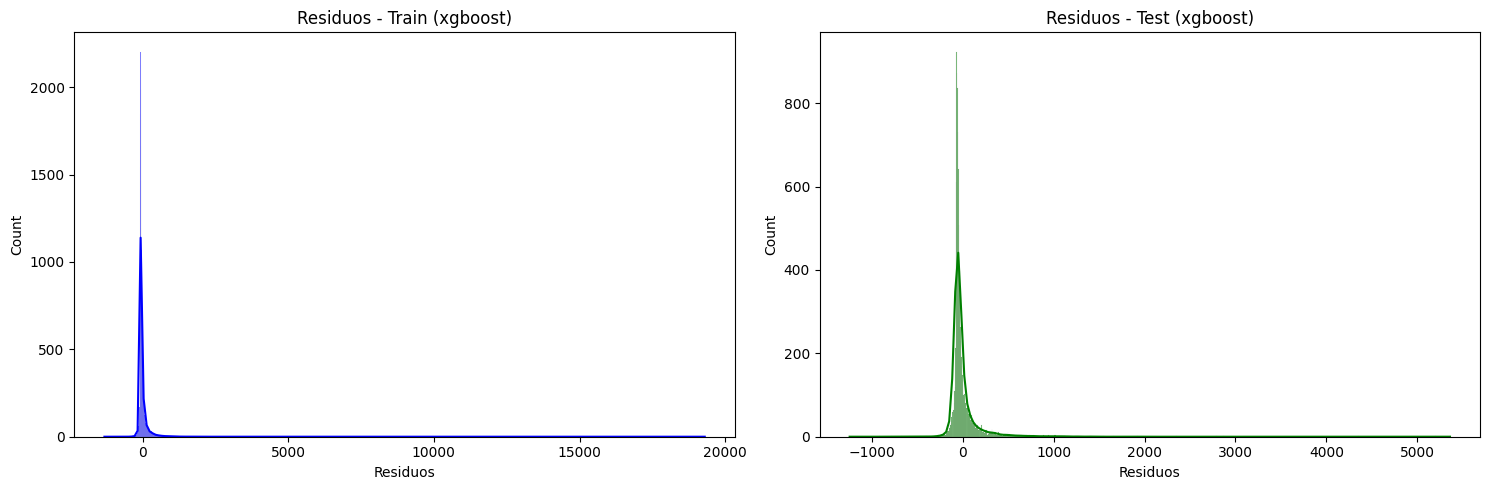

In [17]:
analisis_xgboost.plot_residuos("xgboost")

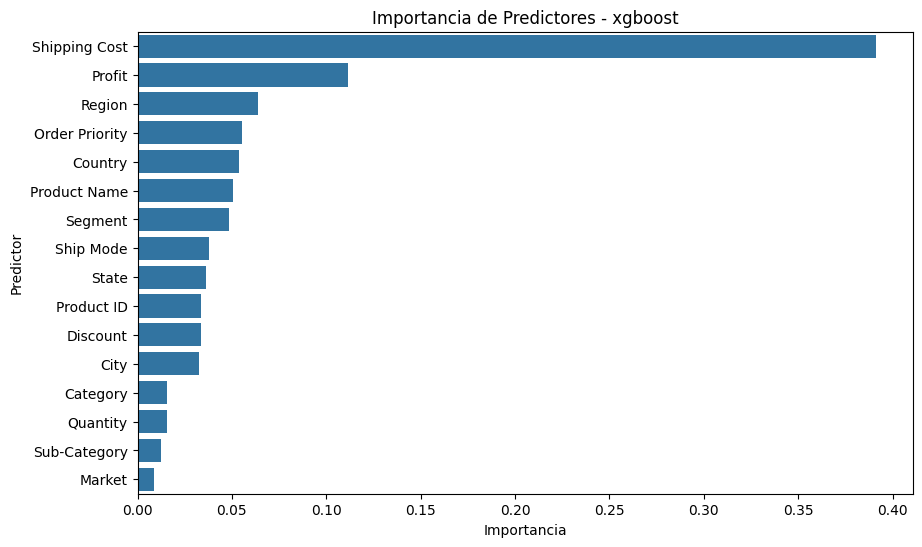

,Predictor,Importancia
14,Shipping Cost,0.39
13,Profit,0.11
6,Region,0.06
15,Order Priority,0.06
4,Country,0.05
10,Product Name,0.05
1,Segment,0.05
0,Ship Mode,0.04
3,State,0.04
7,Product ID,0.03


In [18]:
analisis_xgboost.importancia_predictores("xgboost")

In [19]:
analisis.calcular_metricas("tree")

,train,test
R2,0.79,0.80
MAE,86.46,89.43
MSE,"50,754.53","45,106.84"
RMSE,225.29,212.38


In [20]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.78,0.81
MAE,91.45,92.88
MSE,"52,006.18","41,633.00"
RMSE,228.05,204.04


In [21]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")

,train,test
R2,0.72,0.72
MAE,119.65,121.87
MSE,"67,984.41","61,626.82"
RMSE,260.74,248.25


In [22]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.85,0.82
MAE,81.13,84.20
MSE,"35,018.02","39,404.05"
RMSE,187.13,198.50


In [23]:
analisis_random_forest.obtener_resultados().head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
2558,"2,276.48",765.83,Train,random_forest,"1,510.66"
15041,289.71,278.31,Train,random_forest,11.40
38072,17.40,42.42,Train,random_forest,-25.02
